In [4]:
import os
import glob
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../Clustering/custom_function')
import clustering

from scipy.stats import spearmanr #Loocv

import warnings
warnings.filterwarnings("ignore")

# Clustering

In [3]:
dim_rel_scaled = pd.read_csv('output_data/cleaning_results/CHN/CHN_dim_rel_scaled_NLP_258r_30d.csv',index_col=0)
pca_5c_30d_scores = pd.read_csv('output_data/pca_results/CHN/CHN_NLP_258rel_30d_scores_var.csv',index_col=0)
pca_5c_30d_scores.columns = ['Activeness','Exchange','Formality','Valence','Equality']
pca_5c_30d_scores['Activeness'] = -pca_5c_30d_scores['Activeness']

## Raw data

Text(0, 0.5, 'Silhouette Value')

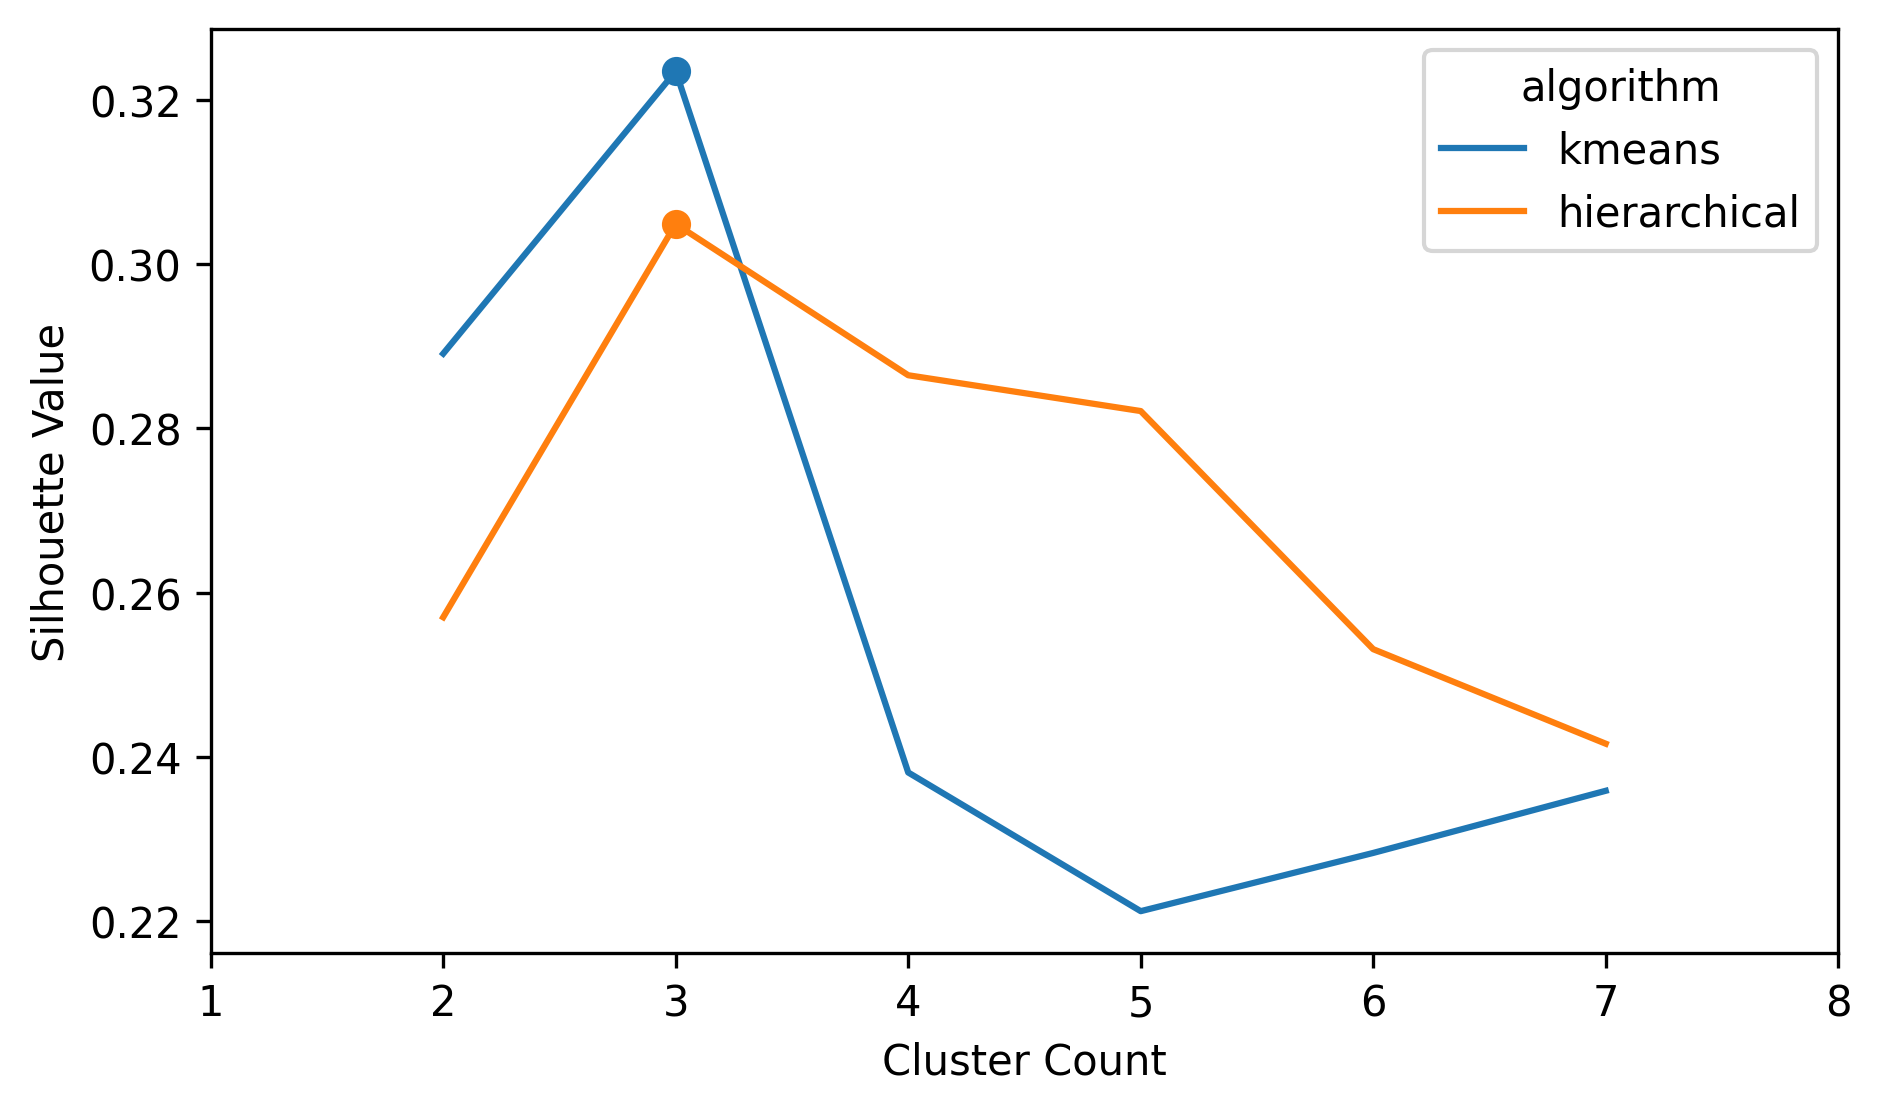

In [5]:
silhouette_result_df = clustering.optimalK_grouped(data_type='df', data=dim_rel_scaled, 
                            algorithm1='kmeans', algorithm2='hierarchical', 
                            title='', random_state=2022, maxClusters=8)
# Plot the silhouette scores for each algorithm
plt.figure(figsize=(7,4),dpi=300)
plt.xlim(1,8)
sns.lineplot(data=silhouette_result_df, x="clusterCount", y="silhouette", hue="algorithm")

algorithm1_df = silhouette_result_df[silhouette_result_df['algorithm']=='kmeans']
algorithm2_df = silhouette_result_df[silhouette_result_df['algorithm']=='hierarchical']
plt.scatter(algorithm1_df.loc[algorithm1_df['silhouette'].idxmax(),'clusterCount'], 
                algorithm1_df['silhouette'].max())
plt.scatter(algorithm2_df.loc[algorithm2_df['silhouette'].idxmax(),'clusterCount'], 
                algorithm2_df['silhouette'].max())
plt.xlabel('Cluster Count')
plt.ylabel('Silhouette Value')

In [6]:
raw_results = clustering.create_cluster_models(data_type = "df",data = dim_rel_scaled,
                        methods=['KMeans'],ks=[3],keep_orig=True)

raw_results.to_csv('output_data/cluster_results/CHN_NLP_raw258rel30d_dissim_3k.csv')

for n in range(len(raw_results['cl_k3'].unique())):
    each_cluster = raw_results.index[raw_results['cl_k3']==n]
    print("\nCluster "+str(n+1)+" Relationship:{}".format(len(each_cluster)))
    print(*raw_results.index[raw_results['cl_k3']==n], sep = ", ")


Cluster 1 Relationship:82
Senior student and Junior student, Adoptive father and Adoptive child, Master and Apprentice, Between sport mates, Between childhood sweetheart, Between travel mates, Between fellow townsman, Between old friends, God Parent and God Child, Between people who are flirting, Parent and Son/Daughter, Between family in law, Mother in law and Wife, Between players of the same sports team, Samaritan and Recipient, Helper and Recipient, Between members of the same team, Between Between teammates of E and sports, Between alumni, Between classmates, Guest and Host, Between confidants, Between brothers-in-arms, Between a person and their family friends, Bride and Groom, Between playmates, Between childhood friends, Between fans of the same sports team, Between roommates, Between ex-lovers, Between friends, Between friends with benefits, Between neighbors, Between romantic lovers, Man and His Mistress, Between pen-friends, Between a person and their crush, Ancestor and De

Cluster1 = Private(82)    
Cluster2 = Public(124)    
Cluster3 = Hostile(52)

## PCA data

Text(0, 0.5, 'Silhouette Value')

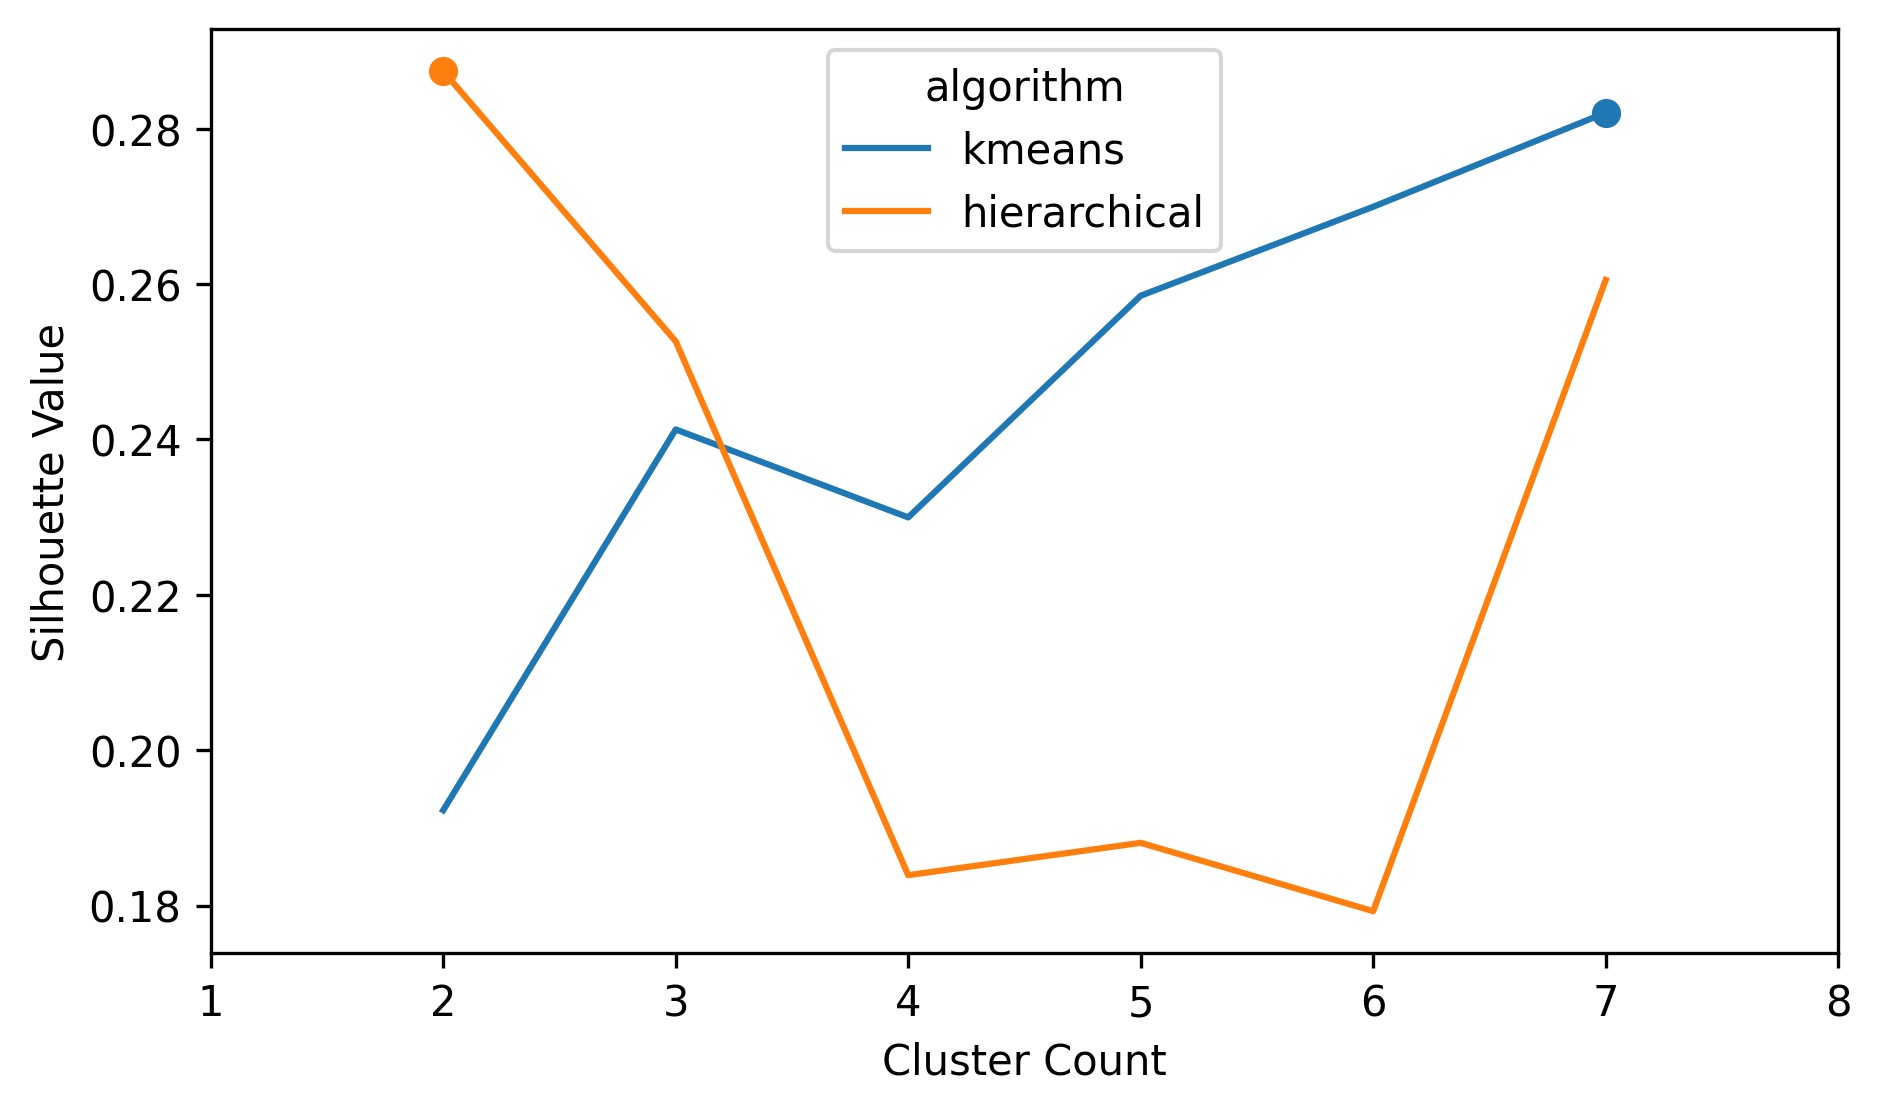

In [7]:
silhouette_result_df = clustering.optimalK_grouped(data_type='df', data=pca_5c_30d_scores, 
                            algorithm1='kmeans', algorithm2='hierarchical', 
                            title='', random_state=2022, maxClusters=8)
# Plot the silhouette scores for each algorithm
plt.figure(figsize=(7,4),dpi=300)
plt.xlim(1,8)
sns.lineplot(data=silhouette_result_df, x="clusterCount", y="silhouette", hue="algorithm")

algorithm1_df = silhouette_result_df[silhouette_result_df['algorithm']=='kmeans']
algorithm2_df = silhouette_result_df[silhouette_result_df['algorithm']=='hierarchical']
plt.scatter(algorithm1_df.loc[algorithm1_df['silhouette'].idxmax(),'clusterCount'], 
                algorithm1_df['silhouette'].max())
plt.scatter(algorithm2_df.loc[algorithm2_df['silhouette'].idxmax(),'clusterCount'], 
                algorithm2_df['silhouette'].max())
plt.xlabel('Cluster Count')
plt.ylabel('Silhouette Value')

In [8]:
pca_results = clustering.create_cluster_models(data_type = "df",data = pca_5c_30d_scores,
                        methods=['KMeans'],ks=[3],keep_orig=True)

pca_results.to_csv('output_data/cluster_results/CHN_NLP_pca258rel30d_5c_3k.csv')

for n in range(len(pca_results['cl_k3'].unique())):
    each_cluster = pca_results.index[pca_results['cl_k3']==n]
    print("\nCluster "+str(n+1)+" Relationship:{}".format(len(each_cluster)))
    print(*pca_results.index[pca_results['cl_k3']==n], sep = ", ")


Cluster 1 Relationship:92
Senior student and Junior student, Adoptive father and Adoptive child, Between net friends, Local and Visitor, Between sport mates, Between childhood sweetheart, Beggar and Passerby, Between travel mates, Between fellow townsman, Between old friends, God Parent and God Child, Accosting people and Accosted people, Between people who are flirting, Parent and Son/Daughter, Between family in law, Mother in law and Wife, Between players of the same sports team, Between former colleagues, Benefactor and Beneficiary, Samaritan and Recipient, Helper and Recipient, Between Between teammates of E and sports, Between alumni, Between classmates, Guest and Host, Between confidants, Between brothers-in-arms, Celebrity and Fans, Between a person and their family friends, Bride and Groom, Between playmates, Between childhood friends, Between fans of the same sports team, Between roommates, Between ex-lovers, Between friends, Between friends with benefits, Between strangers, 

Cluster1 = Private(92)    
Cluster2 = Public(123)    
Cluster3 = Hostile(43)

# Cube: hybird model

In [9]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

In [10]:
def get_cube(limits=None):
    """get the vertices, edges, and faces of a cuboid defined by its limits

    limits = np.array([[x_min, x_max],
                       [y_min, y_max],
                       [z_min, z_max]])
    """
    v = np.array([[0, 0, 0], [0, 0, 1],
                  [0, 1, 0], [0, 1, 1],
                  [1, 0, 0], [1, 0, 1],
                  [1, 1, 0], [1, 1, 1]], dtype=int)

    if limits is not None:
        v = limits[np.arange(3)[np.newaxis, :].repeat(8, axis=0), v]

    e = np.array([[0, 1], [0, 2], [0, 4],
                  [1, 3], [1, 5],
                  [2, 3], [2, 6],
                  [3, 7],
                  [4, 5], [4, 6],
                  [5, 7],
                  [6, 7]], dtype=int)

    f = np.array([[0, 2, 3, 1],
                  [0, 4, 5, 1],
                  [0, 4, 6, 2],
                  [1, 5, 7, 3],
                  [2, 6, 7, 3],
                  [4, 6, 7, 5]], dtype=int)

    return v, e, f

In [11]:
pca_5c_3k = pd.read_csv('output_data/cluster_results/CHN_NLP_pca258rel30d_5c_3k.csv',
                       index_col=0,usecols=range(0,7))

# transform into range[0,1]
Equality_values = pca_5c_3k['Equality']
Exchange_values = pca_5c_3k['Exchange']
pca_5c_3k['Equality_plot'] = (Equality_values -Equality_values.min())/(Equality_values.max()-Equality_values.min())
pca_5c_3k['Exchange_plot'] = (Exchange_values -Exchange_values.min())/(Exchange_values.max()-Exchange_values.min())

pca_5c_3k['rel'] = pca_5c_3k.index
pca_5c_3k.loc[pca_5c_3k['cl_k3']==0,'cluster'] = 'Private'
pca_5c_3k.loc[pca_5c_3k['cl_k3']==1,'cluster'] = 'Public'
pca_5c_3k.loc[pca_5c_3k['cl_k3']==2,'cluster'] = 'Hostile'

pca_5c_3k.head()

Activeness  Exchange  \
Teach Assistant and Student                           0.608313  0.200505   
Senior student and Junior student                    -0.455989 -0.816253   
President of student union and Member of studen...    0.368973 -0.055477   
Club president and Club member                        0.472998 -0.146689   
Teacher and Parent                                    0.066102 -0.284640   

                                                    Formality   Valence  \
Teach Assistant and Student                          0.981137  0.385752   
Senior student and Junior student                    0.086526  1.226880   
President of student union and Member of studen...   0.709257  0.150361   
Club president and Club member                       0.850011  0.023501   
Teacher and Parent                                   1.135638  0.655203   

                                                    Equality  cl_k3  \
Teach Assistant and Student                        -0.264187      1   
Senior student and Junior student                  -0.015412      0   
President of student union and Member of studen...  0.236685      1   
Club president and Club member                      0.408628      1   
Teacher and Parent                                  0.256233      1   

                                                    Equality_plot  \
Teach Assistant and Student                              0.505162   
Senior student and Junior student                        0.554740   
President of student union and Member of studen...       0.604980   
Club president and Club member                           0.639246   
Teacher and Parent                                       0.608876   

                                                    Exchange_plot  \
Teach Assistant and Student                              0.409569   
Senior student and Junior student                        0.172441   
President of student union and Member of studen...       0.349869   
Club president and Club member                           0.328597   
Teacher and Parent                                       0.296424   

                                                                                                  rel  \
Teach Assistant and Student                                               Teach Assistant and Student   
Senior student and Junior student                                   Senior student and Junior student   
President of student union and Member of studen...  President of student union and Member of stude...   
Club president and Club member                                         Club president and Club member   
Teacher and Parent                                                                 Teacher and Parent   

                                                    cluster  
Teach Assistant and Student                          Public  
Senior student and Junior student                   Private  
President of student union and Member of studen...   Public  
Club president and Club member                       Public  
Teacher and Parent                                   Public

In [12]:
print(pca_5c_3k['Activeness'].max(),pca_5c_3k['Activeness'].min())
print(pca_5c_3k['Formality'].max(),pca_5c_3k['Formality'].min())
print(pca_5c_3k['Valence'].max(),pca_5c_3k['Valence'].min())

2.20836415761752 -3.11692917956583
1.79075363295483 -3.20327400041295
1.85687498529232 -2.80811890536566


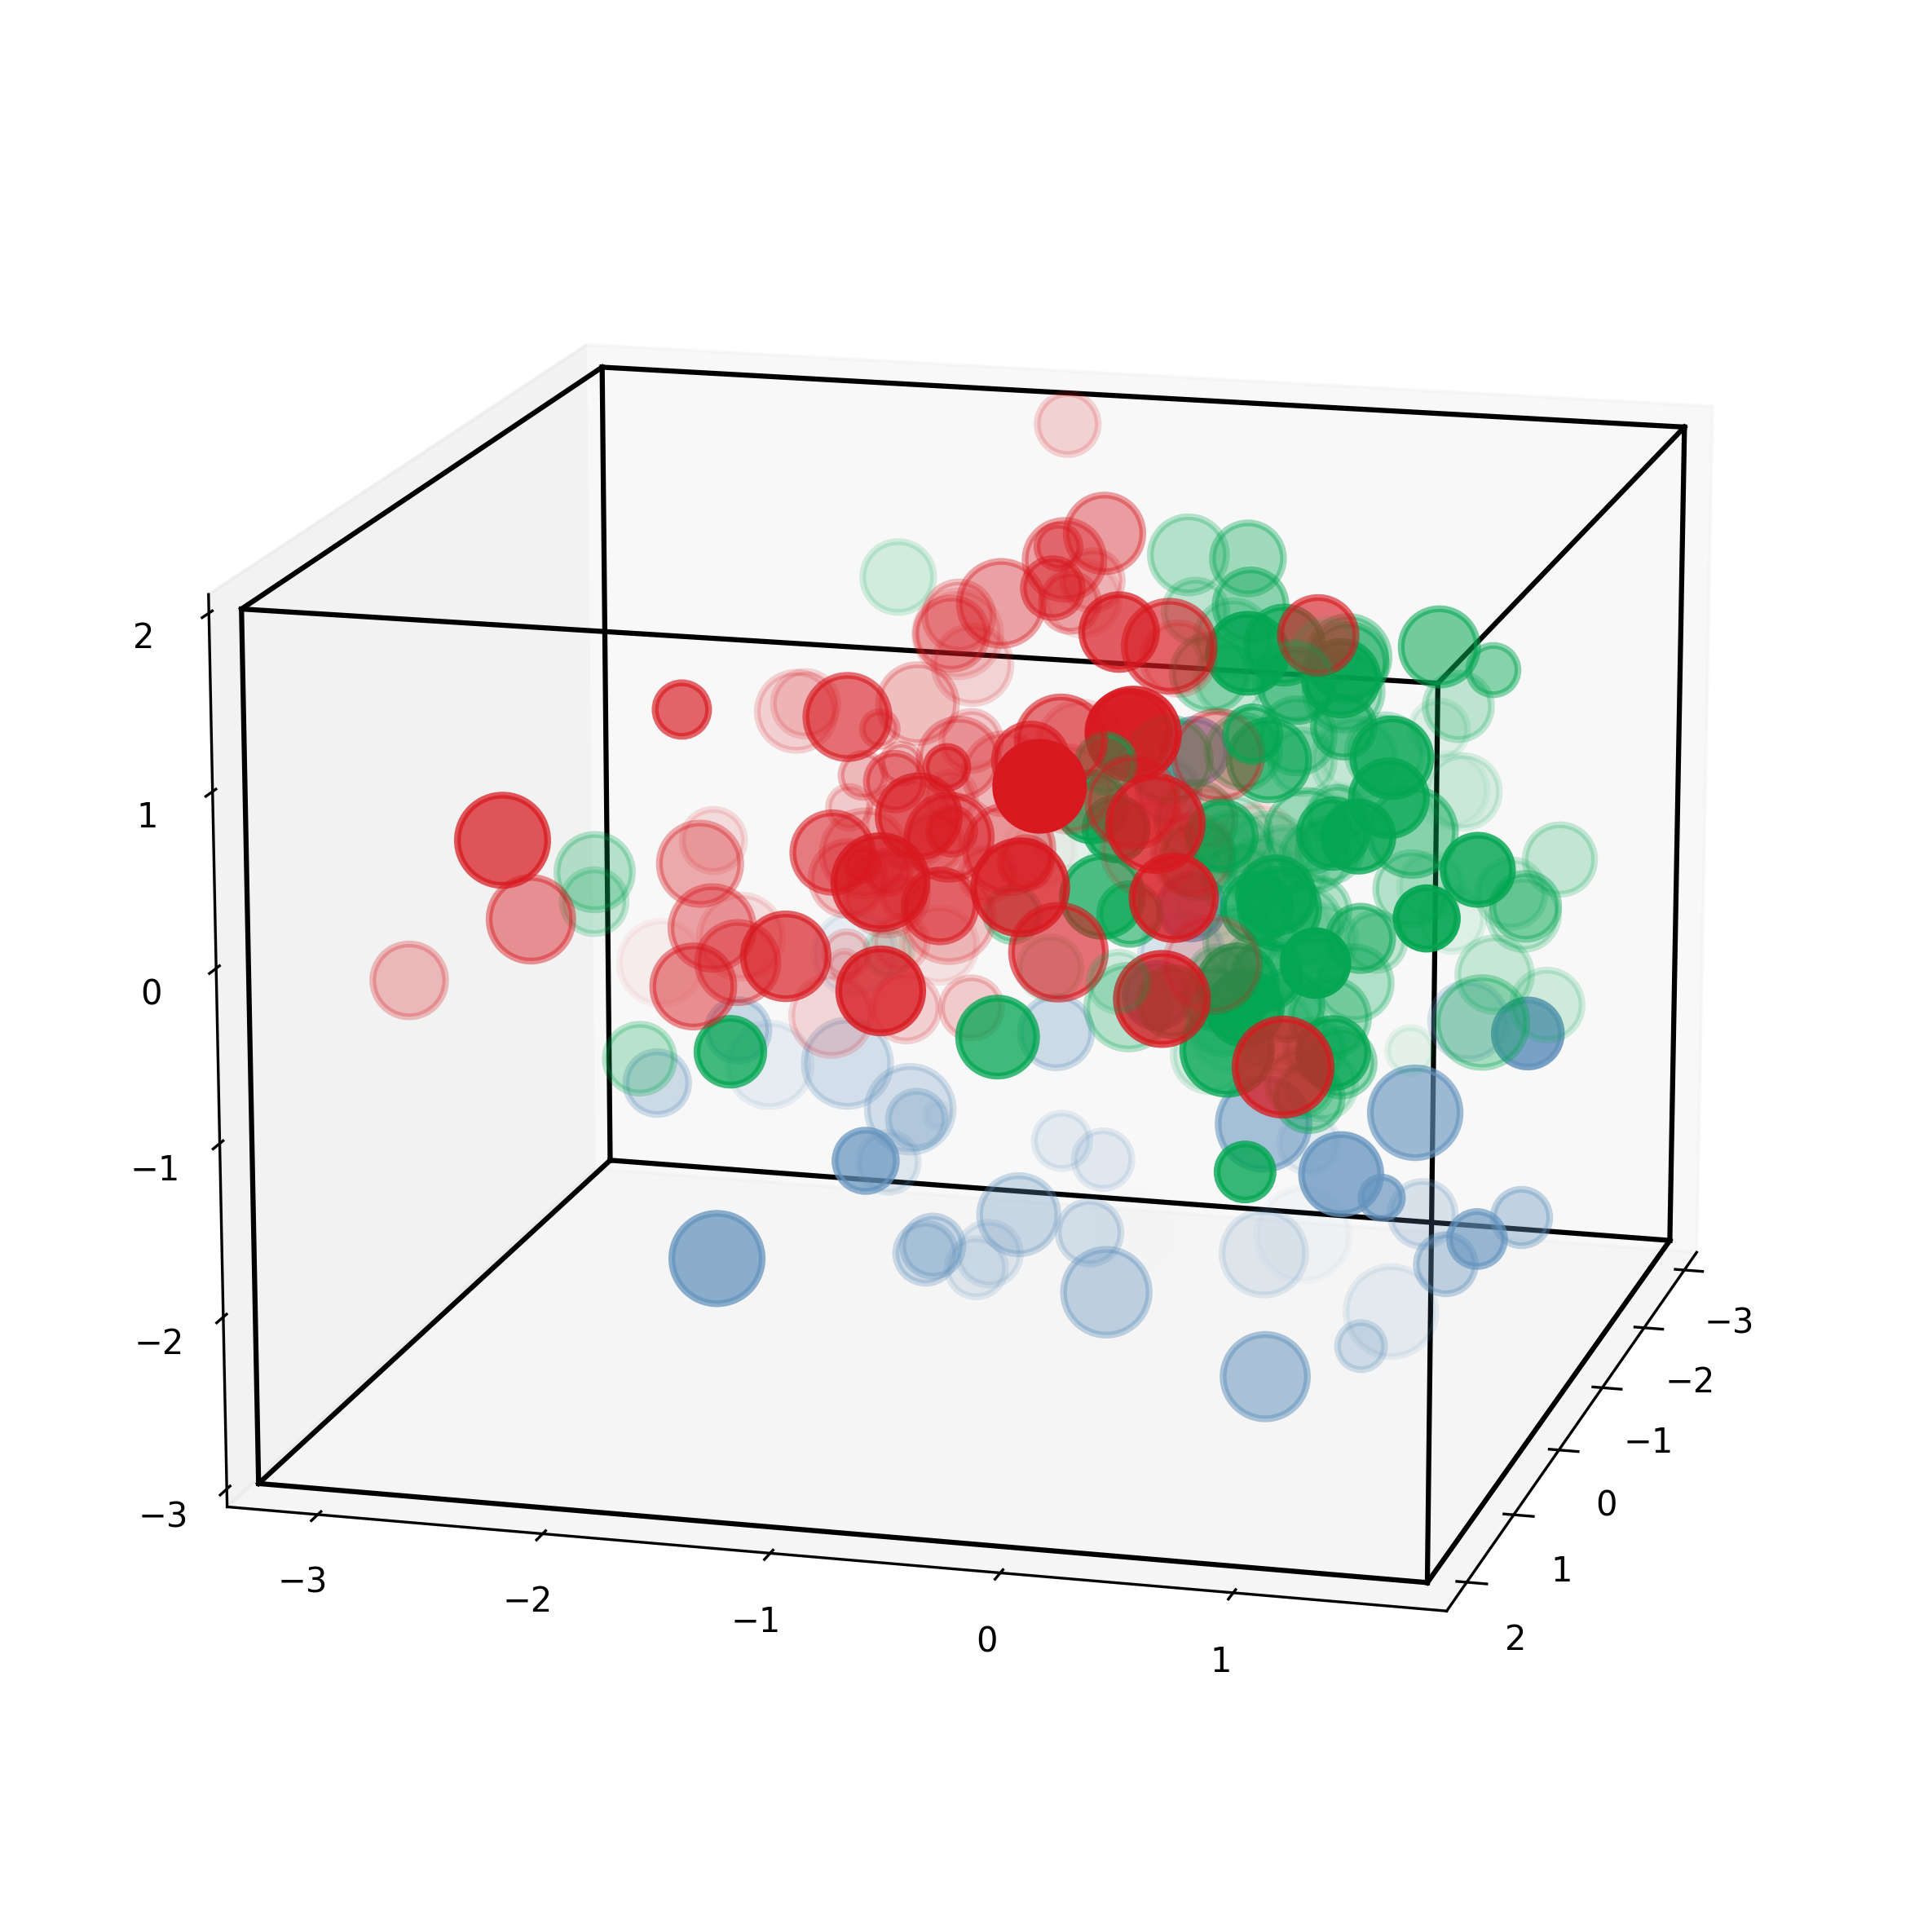

In [13]:
fig = plt.figure(figsize=(10,10),dpi=300)
ax = plt.axes(projection='3d')
mycolor = ["#D81920", # red
           "#03A652", # green
           "#6594BE" # blue
          ] 
cmaps = mpl.colors.LinearSegmentedColormap.from_list('mylist',mycolor,N=3)

ax.scatter3D(pca_5c_3k['Activeness'],pca_5c_3k['Formality'], pca_5c_3k['Valence'], 
             s=pca_5c_3k['Equality_plot']*800, c=pca_5c_3k['cl_k3'],
             alpha = pca_5c_3k['Exchange_plot'],
             linewidth = 2,
             cmap = cmaps)
ax.set_xlim(-3.2,2.3)
ax.set_ylim(-3.3,1.8)
ax.set_zlim(-3,2)

ax.view_init(15, 15)

# First remove fill
# ax.xaxis.pane.fill = False
# ax.yaxis.pane.fill = False
# ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
# ax.xaxis.pane.set_edgecolor('w')
# ax.yaxis.pane.set_edgecolor('w')
# ax.zaxis.pane.set_edgecolor('w')

# Bonus: To get rid of the grid as well:
ax.grid(False)

#ax.set_axis_off()


limits = np.array([[-3.2,2.3],
                   [-3.3,1.8],
                   [-3,2]])

v, e, f = get_cube(limits)

for i, j in e:
    ax.plot(*v[[i, j], :].T, color='black', ls='-')

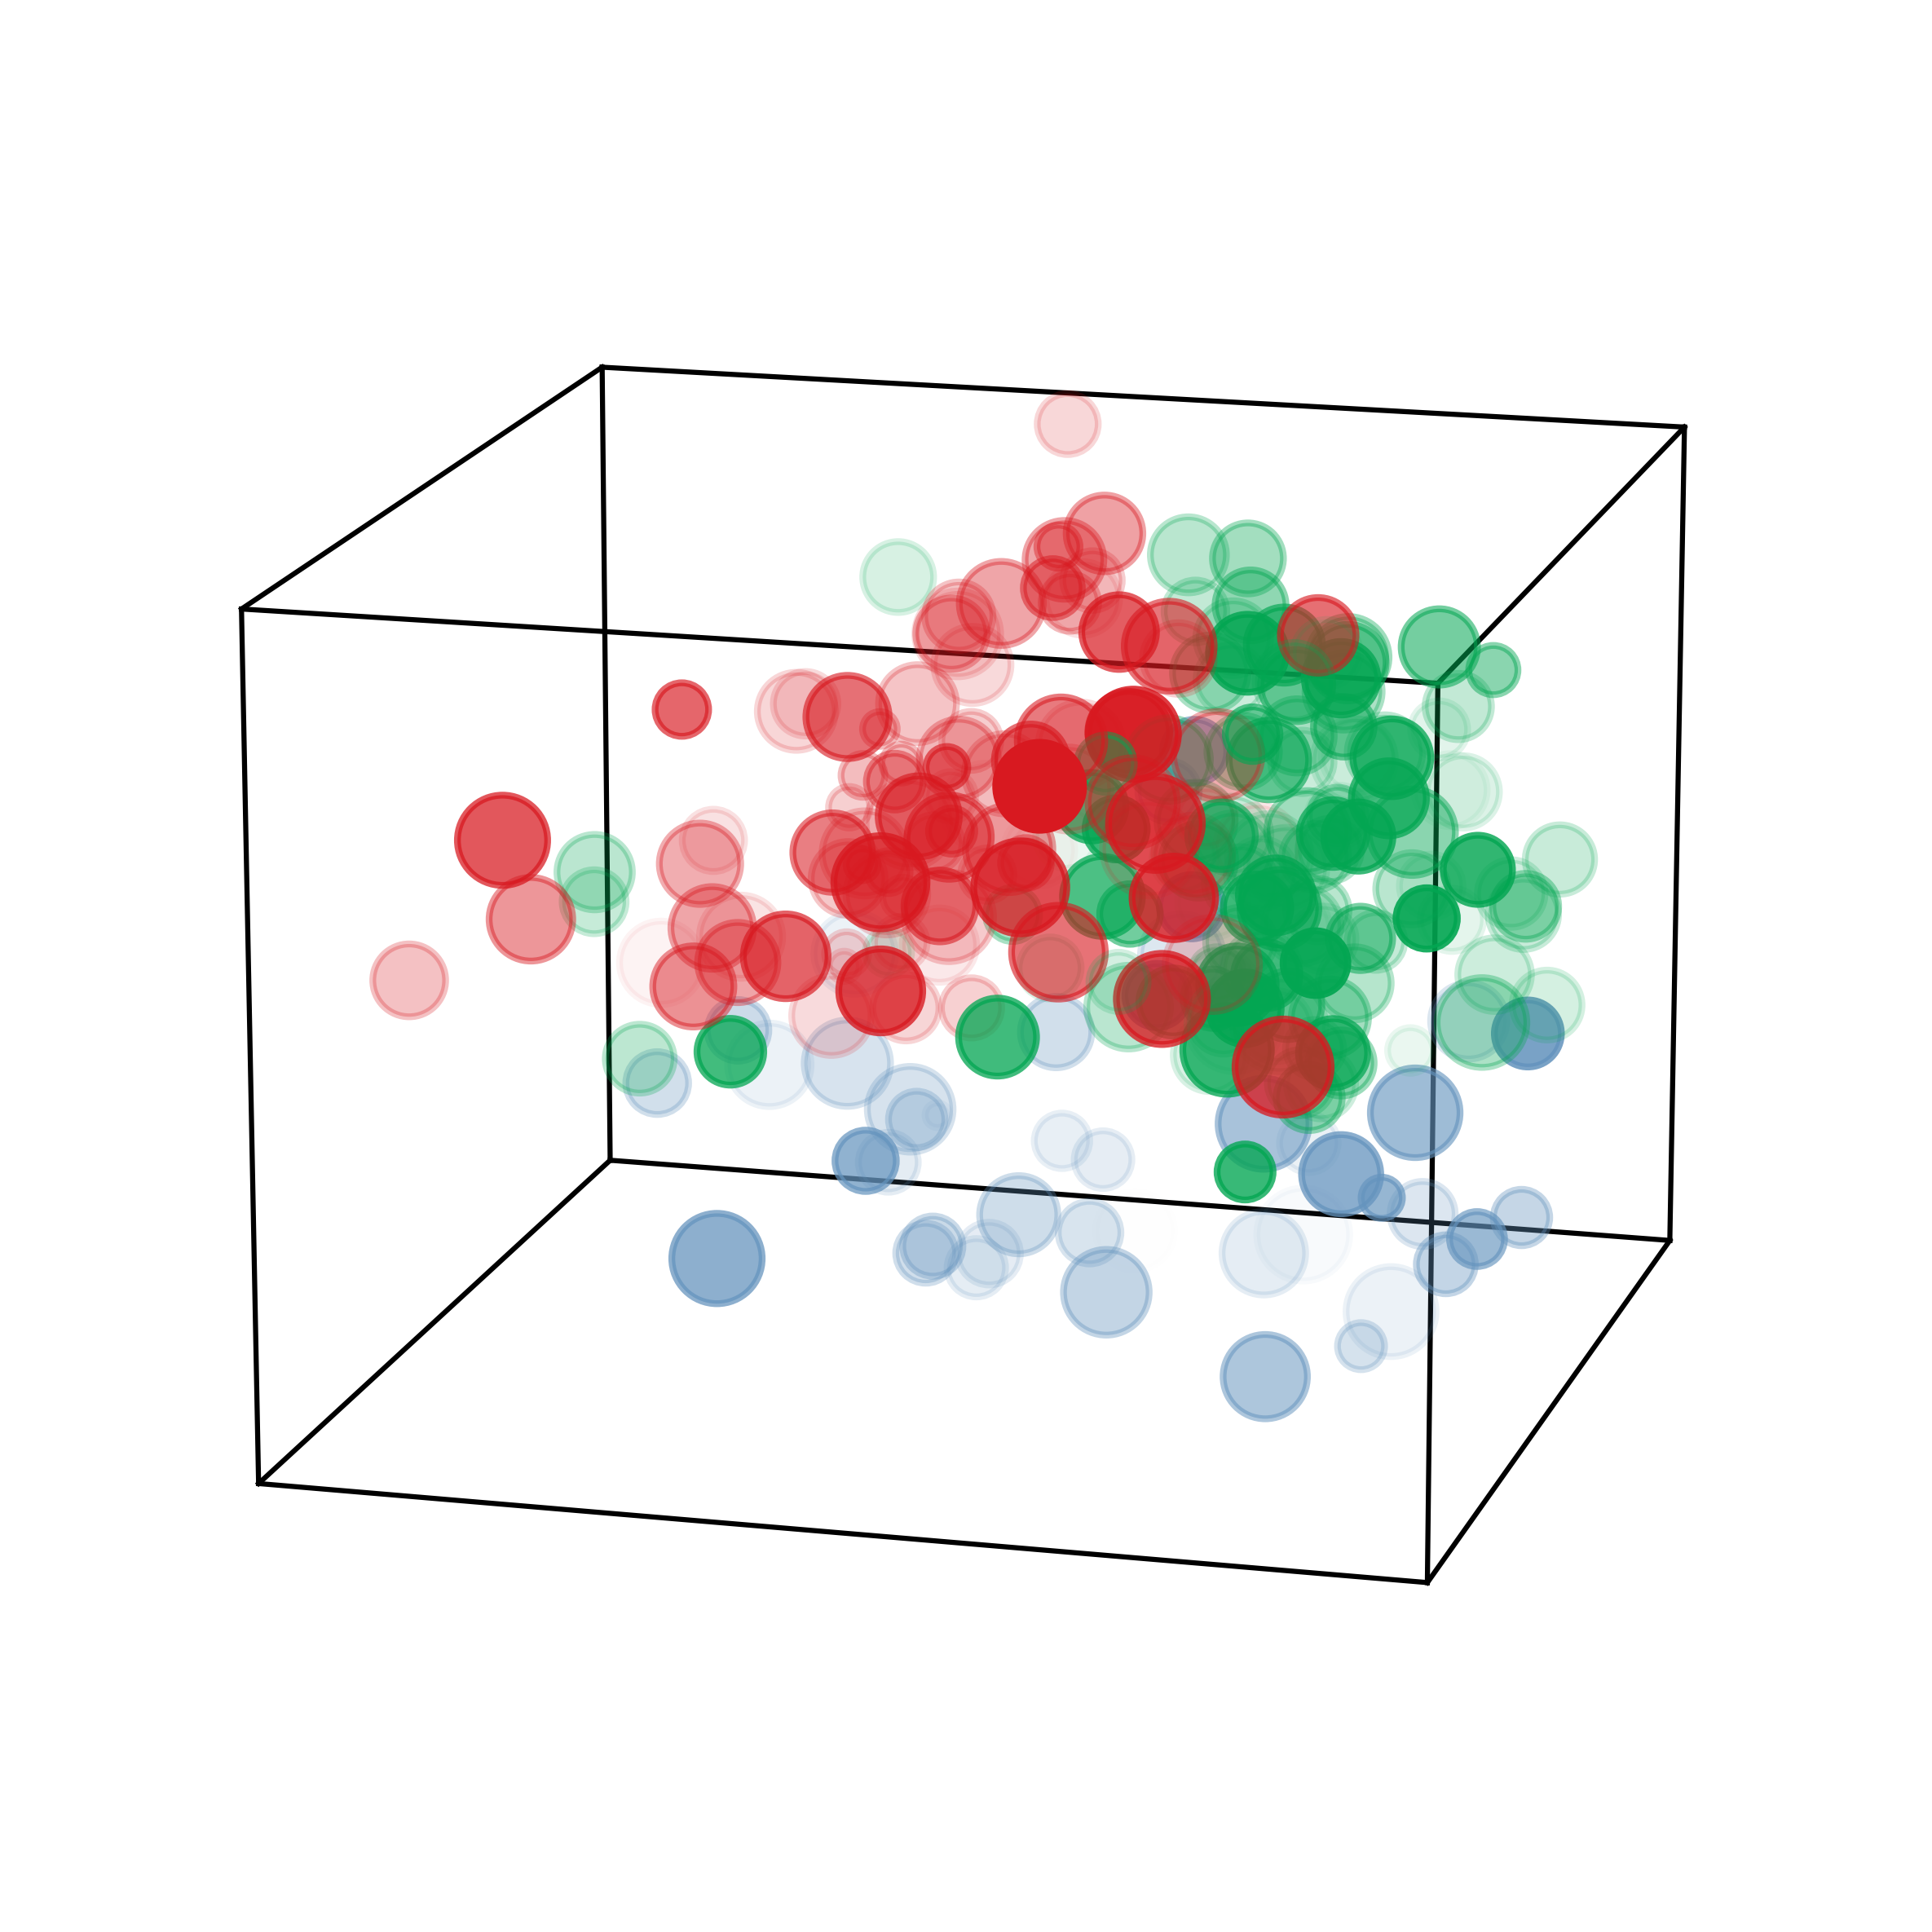

In [14]:
fig = plt.figure(figsize=(10,10),dpi=300)
ax = plt.axes(projection='3d')
mycolor = ["#D81920", # red
           "#03A652", # green
           "#6594BE" # blue
          ] 
cmaps = mpl.colors.LinearSegmentedColormap.from_list('mylist',mycolor,N=3)

ax.scatter3D(pca_5c_3k['Activeness'],pca_5c_3k['Formality'], pca_5c_3k['Valence'], 
             s=pca_5c_3k['Equality_plot']*800, c=pca_5c_3k['cl_k3'],
             alpha = pca_5c_3k['Exchange_plot'],
             linewidth = 2,
             cmap = cmaps)
ax.set_xlim(-3.2,2.3)
ax.set_ylim(-3.3,1.8)
ax.set_zlim(-3,2)

ax.view_init(15, 15)

# First remove fill
# ax.xaxis.pane.fill = False
# ax.yaxis.pane.fill = False
# ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
# ax.xaxis.pane.set_edgecolor('w')
# ax.yaxis.pane.set_edgecolor('w')
# ax.zaxis.pane.set_edgecolor('w')

# Bonus: To get rid of the grid as well:
ax.grid(False)

ax.set_axis_off()


limits = np.array([[-3.2,2.3],
                   [-3.3,1.8],
                   [-3,2]])

v, e, f = get_cube(limits)

for i, j in e:
    ax.plot(*v[[i, j], :].T, color='black', ls='-')

# Circular dendgram: categorical model(HPP)

In [7]:
# Circular_dengram
library(ggraph)
library(igraph)
library(tidyverse)
library(mgsub)

In [19]:
cluster_results = read.csv('output_data/cluster_results/CHN_NLP_pca258rel30d_5c_3k.csv',
                           row.names=1) 
# Relationship labels that are more concise
mapping = read.csv('output_data/cluster_results/rels_simple.csv')
colnames(mapping) = c('origin','simple')
rownames(cluster_results) = mgsub(rownames(cluster_results),
                                  mapping$'origin',mapping$'simple')
write.csv(cluster_results,'output_data/cluster_results/CHN_NLP_pca258rel30d_5c_3k_simple.csv')

cluster_k3 = as.matrix(cluster_results['cl_k3'])
cluster_k3 = data.frame(cluster_k3[order(cluster_k3[,1]),])
colnames(cluster_k3) =c('cl_k3')

Private = rownames(cluster_k3 %>% filter(cl_k3==0))
Public = rownames(cluster_k3 %>% filter(cl_k3==1))
Hostile = rownames(cluster_k3 %>% filter(cl_k3==2))

cluster_k3 = cluster_k3 %>% mutate(cluster = 
                        case_when(cl_k3==0~'Private',
                                  cl_k3==1~'Public',
                                  cl_k3==2~'Hostile'))

In [20]:
# create a data frame giving the hierarchical structure of your individuals
d1=data.frame(from="Total", to=c('Private','Hostile','Public'))
d2=data.frame(from=c(cluster_k3$'cluster'),to=c(Private,Hostile,Public))
edges=rbind(d1, d2)

# create a vertices data.frame. One line per object of our hierarchy
vertices = data.frame(
  name = unique(c(as.character(edges$from), as.character(edges$to))) , 
  value = runif(262)
) 
# Let's add a column with the group of each name. It will be useful later to color points
vertices$group = edges$from[ match( vertices$name, edges$to ) ]

#Let's add information concerning the label we are going to add: angle, horizontal adjustement and potential flip
#calculate the ANGLE of the labels
vertices$id=NA
myleaves=which(is.na( match(vertices$name, edges$from) ))
nleaves=length(myleaves)
vertices$id[ myleaves ] = seq(1:nleaves)
vertices$angle= 90 - 360 * vertices$id / nleaves

# calculate the alignment of labels: right or left
# If I am on the left part of the plot, my labels have currently an angle < -90
vertices$hjust<-ifelse( vertices$angle < -90, 1, 0)

# flip angle BY to make them readable
vertices$angle<-ifelse(vertices$angle < -90, vertices$angle+180, vertices$angle)

# Create a graph object
mygraph <- graph_from_data_frame( edges, vertices=vertices )

my_colors = c('Hostile'='#52DCF5','Public'='#3FCA36','Private'='#FF4C27')

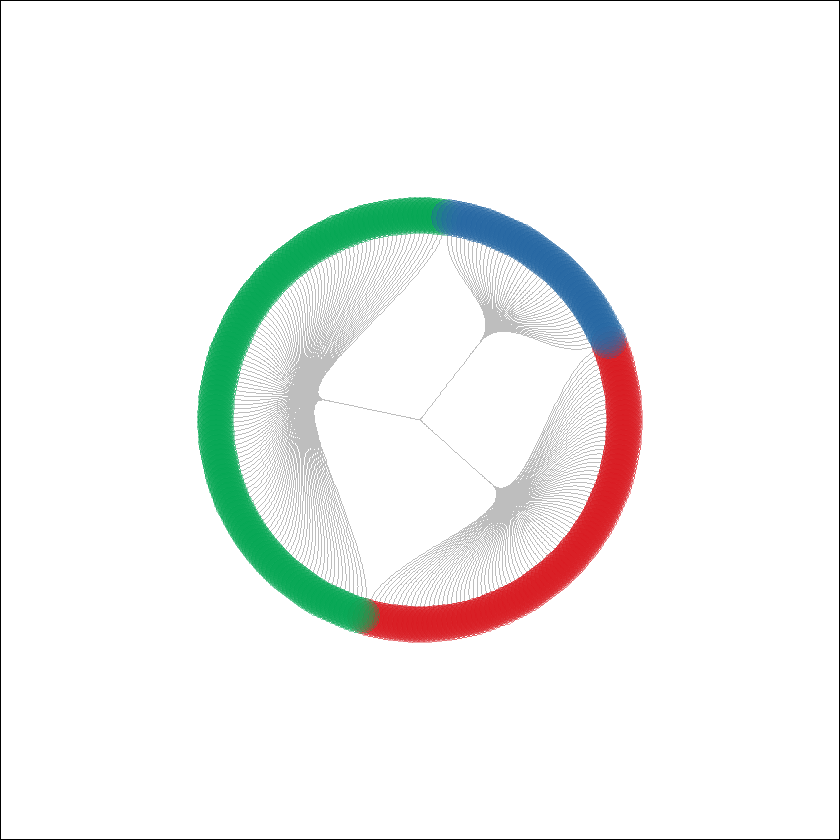

In [21]:
my_colors = c('Hostile'='#2466A2','Public'='#03A652','Private'='#D81920')
# Make the plot
ggraph(mygraph, layout = 'dendrogram', circular = TRUE) + 
  geom_edge_diagonal(colour="grey") +
  #scale_edge_colour_distiller(palette = "RdPu") +
  scale_colour_manual(values=my_colors)+
#   geom_node_text(aes(x = x*1.15, y=y*1.15, filter = leaf, 
#                      label=name, angle = angle, hjust=hjust, colour=group),
#                      size=5, alpha=1) +
  geom_node_point(aes(filter = leaf, x = x*1.07, y=y*1.07, 
                      colour=group), size=10, alpha=0.4) +
  theme_void() +
  theme(
    legend.position="none",
    plot.margin=unit(c(0,0,0,0),"cm"),
    panel.background = element_rect(fill='white')
  ) +
  expand_limits(x = c(-2, 2), y = c(-2, 2))

In [22]:
png('../output_graph/USA_CHN/CHN_NLP_258rel30d_raw_3k_white.png',family='sans',
    units='in',width=16,height=16,res=300)
# Make the plot
ggraph(mygraph, layout = 'dendrogram', circular = TRUE) + 
  geom_edge_diagonal(colour="grey") +
  #scale_edge_colour_distiller(palette = "RdPu") +
  scale_colour_manual(values=my_colors)+
  #geom_node_text(aes(x = x*1.15, y=y*1.15, filter = leaf, label=name, angle = angle, hjust=hjust, colour=group), size=5, alpha=1) +
  geom_node_point(aes(filter = leaf, x = x*1.07, y=y*1.07, colour=group),
                  size=10, alpha=0.4) +
  theme_void() +
  theme(
    legend.position="none",
    plot.margin=unit(c(0,0,0,0),"cm"),
    panel.background = element_rect(fill='white')
  ) +
  expand_limits(x = c(-2, 2), y = c(-2, 2))
dev.off()

png 
  2

# WordCloud

In [1]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image #mask
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mask = np.array(Image.open('../../Study2/TextAnalysis/circle.jpg'))

In [3]:
clusters_3k = pd.read_csv('output_data/cluster_results/CHN_NLP_pca258rel30d_5c_3k_simple.csv',
                         index_col=0)
clusters_3k.head()

Activeness  Exchange  \
Teach Assistant-Student                               0.608313  0.200505   
Senior student-Junior student                        -0.455989 -0.816253   
President of student union-Member of student union    0.368973 -0.055477   
Club president-Club member                            0.472998 -0.146689   
Teacher-Parent                                        0.066102 -0.284640   

                                                    Formality   Valence  \
Teach Assistant-Student                              0.981137  0.385752   
Senior student-Junior student                        0.086526  1.226880   
President of student union-Member of student union   0.709257  0.150361   
Club president-Club member                           0.850011  0.023501   
Teacher-Parent                                       1.135638  0.655203   

                                                    Equality  cl_k3  
Teach Assistant-Student                            -0.264187      1  
Senior student-Junior student                      -0.015412      0  
President of student union-Member of student union  0.236685      1  
Club president-Club member                          0.408628      1  
Teacher-Parent                                      0.256233      1

In [5]:
CHN_familiar = pd.read_csv('output_data/familiarity/familiarity_258rels_chn.csv',index_col=0)
CHN_familiar = pd.DataFrame(CHN_familiar.apply(np.mean),columns=['familiar'])
CHN_familiar.index = clusters_3k.index
clusters_3k_familiar = pd.merge(clusters_3k,CHN_familiar,left_index=True,right_index=True)

## English version

In [6]:
clusters_3k_familiar['rel'] = clusters_3k_familiar.index
clusters_3k_familiar.head()

Activeness  Exchange  \
Teach Assistant-Student                               0.608313  0.200505   
Senior student-Junior student                        -0.455989 -0.816253   
President of student union-Member of student union    0.368973 -0.055477   
Club president-Club member                            0.472998 -0.146689   
Teacher-Parent                                        0.066102 -0.284640   

                                                    Formality   Valence  \
Teach Assistant-Student                              0.981137  0.385752   
Senior student-Junior student                        0.086526  1.226880   
President of student union-Member of student union   0.709257  0.150361   
Club president-Club member                           0.850011  0.023501   
Teacher-Parent                                       1.135638  0.655203   

                                                    Equality  cl_k3  \
Teach Assistant-Student                            -0.264187      1   
Senior student-Junior student                      -0.015412      0   
President of student union-Member of student union  0.236685      1   
Club president-Club member                          0.408628      1   
Teacher-Parent                                      0.256233      1   

                                                     familiar  \
Teach Assistant-Student                             79.589286   
Senior student-Junior student                       80.585586   
President of student union-Member of student union  75.180952   
Club president-Club member                          76.170543   
Teacher-Parent                                      76.122449   

                                                                                                  rel  
Teach Assistant-Student                                                       Teach Assistant-Student  
Senior student-Junior student                                           Senior student-Junior student  
President of student union-Member of student union  President of student union-Member of student u...  
Club president-Club member                                                 Club president-Club member  
Teacher-Parent                                                                         Teacher-Parent

In [7]:
hostile_df = clusters_3k_familiar[clusters_3k_familiar['cl_k3']==2]
private_df = clusters_3k_familiar[clusters_3k_familiar['cl_k3']==0]
public_df = clusters_3k_familiar[clusters_3k_familiar['cl_k3']==1]

### Hostile

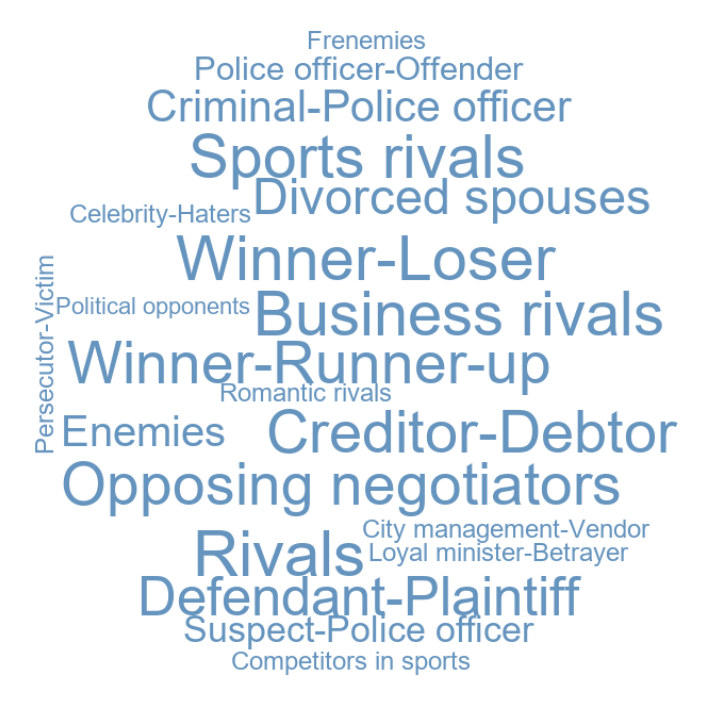

In [9]:
hostile_dict = {hostile_df.iloc[i,-1]:\
                hostile_df.iloc[i,-2] for i in range(len(hostile_df))}

wc = WordCloud(background_color='white',width=600,height=600,mask=mask,
               mode='RGBA',color_func=lambda *args, **kwargs: "#6594BE",
               font_path='font/arial.ttf',
               min_font_size=22,max_font_size=60
               )
wc.generate_from_frequencies(hostile_dict)

plt.figure(figsize=(6,6),dpi=150)
plt.imshow(wc,interpolation="bilinear")  
plt.axis("off")  
plt.show()

### Private

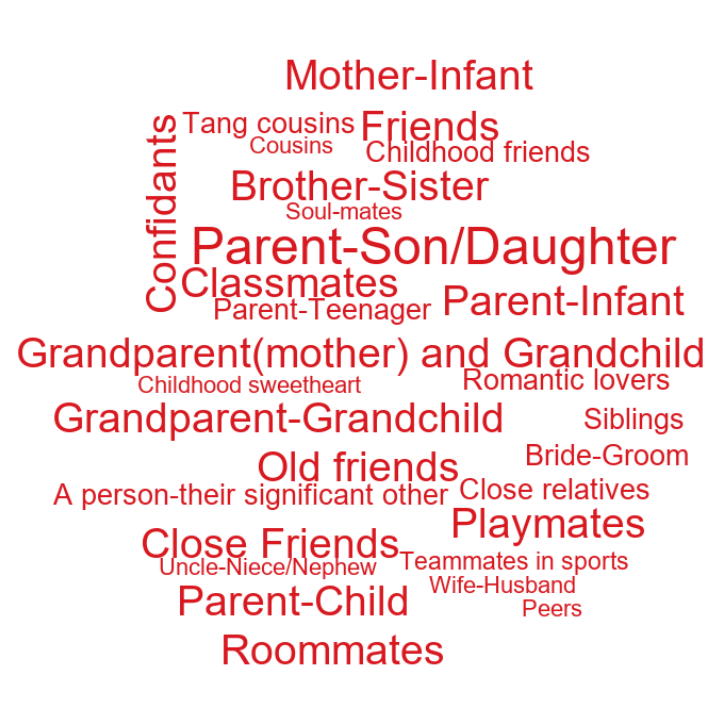

In [12]:
private_dict = {private_df.iloc[i,-1]:\
                private_df.iloc[i,-2] for i in range(len(private_df))}

wc = WordCloud(background_color='white',width=600,height=600,mask=mask,
               mode='RGBA',color_func=lambda *args, **kwargs: "#D81920",
               font_path='font/arial.ttf',
               min_font_size=22
               )
wc.generate_from_frequencies(private_dict)

plt.figure(figsize=(6,6),dpi=150)
plt.imshow(wc,interpolation="bilinear")  
plt.axis("off")  
plt.show()

### Public

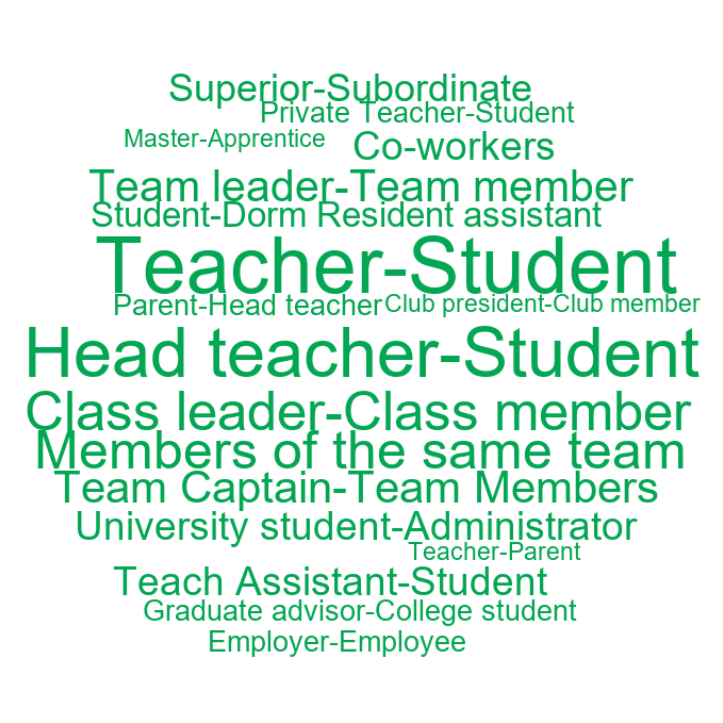

In [13]:
public_dict = {public_df.iloc[i,-1]:\
                public_df.iloc[i,-2] for i in range(len(public_df))}

wc = WordCloud(background_color='white',width=600,height=600,mask=mask,
               mode='RGBA',color_func=lambda *args, **kwargs: "#03A652",
               font_path='font/arial.ttf',
               min_font_size=22
               )
wc.generate_from_frequencies(public_dict)

plt.figure(figsize=(6,6),dpi=150)
plt.imshow(wc,interpolation="bilinear")  
plt.axis("off")  
plt.show()

## Chinese version

In [14]:
CHN_familiar = pd.read_csv('output_data/familiarity/familiarity_258rels_chn.csv',index_col=0)
CHN_familiar = pd.DataFrame(CHN_familiar.apply(np.mean),columns=['familiar'])
CHN_familiar.index = clusters_3k.index
clusters_3k_familiar = pd.merge(clusters_3k,CHN_familiar,left_index=True,right_index=True)
# rels258 = pd.read_csv('input_data/CHN/NLP/Total_Relation_6_trans.csv',header=None)
# rels258 = list(rels258.iloc[:,0])
# clusters_3k_familiar.index = rels258
clusters_3k_familiar.head()

Activeness  Exchange  \
Teach Assistant-Student                               0.608313  0.200505   
Senior student-Junior student                        -0.455989 -0.816253   
President of student union-Member of student union    0.368973 -0.055477   
Club president-Club member                            0.472998 -0.146689   
Teacher-Parent                                        0.066102 -0.284640   

                                                    Formality   Valence  \
Teach Assistant-Student                              0.981137  0.385752   
Senior student-Junior student                        0.086526  1.226880   
President of student union-Member of student union   0.709257  0.150361   
Club president-Club member                           0.850011  0.023501   
Teacher-Parent                                       1.135638  0.655203   

                                                    Equality  cl_k3   familiar  
Teach Assistant-Student                            -0.264187      1  79.589286  
Senior student-Junior student                      -0.015412      0  80.585586  
President of student union-Member of student union  0.236685      1  75.180952  
Club president-Club member                          0.408628      1  76.170543  
Teacher-Parent                                      0.256233      1  76.122449

In [17]:
Chinese = pd.read_excel('../DataCleanPCA/input_data/Nations/CHN/NLP/2_Total_Relation_6.xlsx',sheet_name='Sheet1')
# tranfer_zipped = zip(Chinese['Translate'],Chinese['Relationships'])
# tranfer_map = {key:value for key, value in tranfer_zipped}
# chinese_list = []
# for rel_eng in clusters_3k_familiar.index:
#     rel_chi = tranfer_map[rel_eng]
#     chinese_list.append(rel_chi)
    
# clusters_3k_familiar.index = chinese_list
# clusters_3k_familiar['rel'] = chinese_list
# clusters_3k_familiar.head()
clusters_3k_familiar.index = Chinese['Relationships']
clusters_3k_familiar['rel'] = clusters_3k_familiar.index
clusters_3k_familiar.head()

Activeness  Exchange  Formality   Valence  Equality  cl_k3  \
Relationships                                                               
助教-学生            0.608313  0.200505   0.981137  0.385752 -0.264187      1   
学长学姐-学弟学妹       -0.455989 -0.816253   0.086526  1.226880 -0.015412      0   
学生会主席-学生会成员      0.368973 -0.055477   0.709257  0.150361  0.236685      1   
社团社长-社团社员        0.472998 -0.146689   0.850011  0.023501  0.408628      1   
老师-家长            0.066102 -0.284640   1.135638  0.655203  0.256233      1   

                familiar          rel  
Relationships                          
助教-学生          79.589286        助教-学生  
学长学姐-学弟学妹      80.585586    学长学姐-学弟学妹  
学生会主席-学生会成员    75.180952  学生会主席-学生会成员  
社团社长-社团社员      76.170543    社团社长-社团社员  
老师-家长          76.122449        老师-家长

In [18]:
hostile_df = clusters_3k_familiar[clusters_3k_familiar['cl_k3']==2]
private_df = clusters_3k_familiar[clusters_3k_familiar['cl_k3']==0]
public_df = clusters_3k_familiar[clusters_3k_familiar['cl_k3']==1]

### Hostile

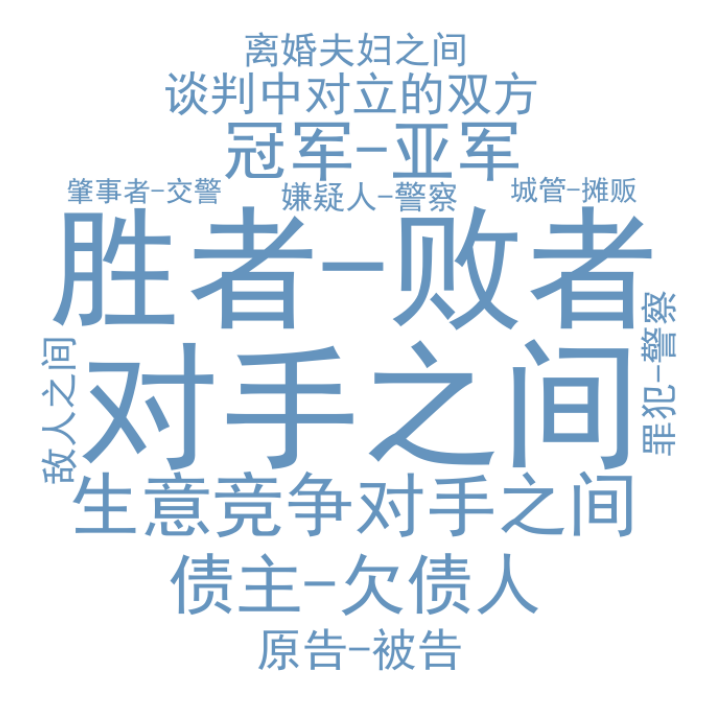

In [53]:
hostile_dict = {hostile_df.iloc[i,-1]:\
                hostile_df.iloc[i,-2] for i in range(len(hostile_df))}
hostile_dict.pop('同一场体育比赛的对手之间（有正面交锋/比赛中的宿敌）')

wc = WordCloud(background_color='white',width=600,height=600,mask=mask,
               mode='RGBA',color_func=lambda *args, **kwargs: "#6594BE",
               font_path='font/simhei.ttf',
               min_font_size=20
               )
wc.generate_from_frequencies(hostile_dict)
# plt.rcParams['font.sans-serif'] = ['Simhei']
# plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(6,6),dpi=150)
plt.imshow(wc,interpolation="bilinear")  
plt.axis("off")  
plt.show()

### Private

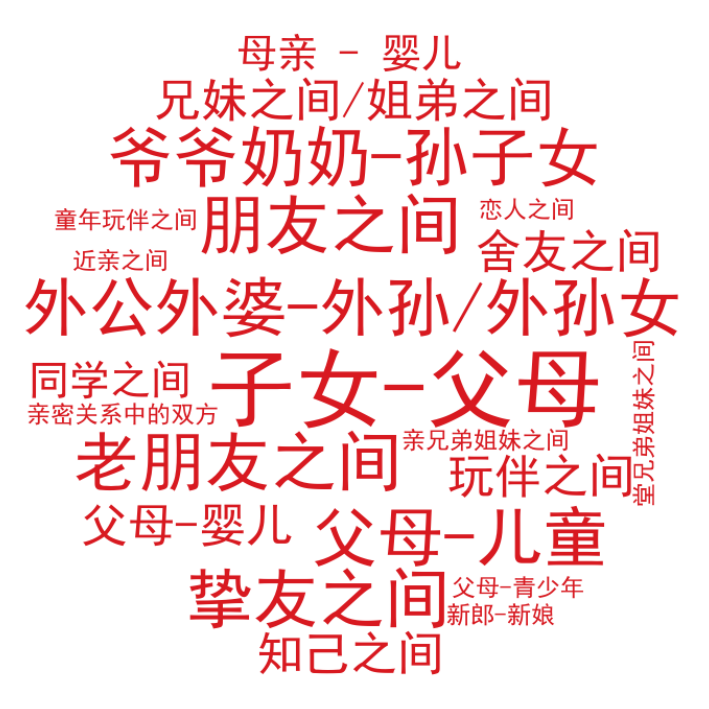

In [55]:
private_dict = {private_df.iloc[i,-1]:\
                private_df.iloc[i,-2] for i in range(len(private_df))}

wc = WordCloud(background_color='white',width=600,height=600,mask=mask,
               mode='RGBA',color_func=lambda *args, **kwargs: "#D81920",
               font_path='font/simhei.ttf',
               min_font_size=20
               )
wc.generate_from_frequencies(private_dict)

plt.figure(figsize=(6,6),dpi=150)
plt.imshow(wc,interpolation="bilinear")  
plt.axis("off")  
plt.show()

### Public

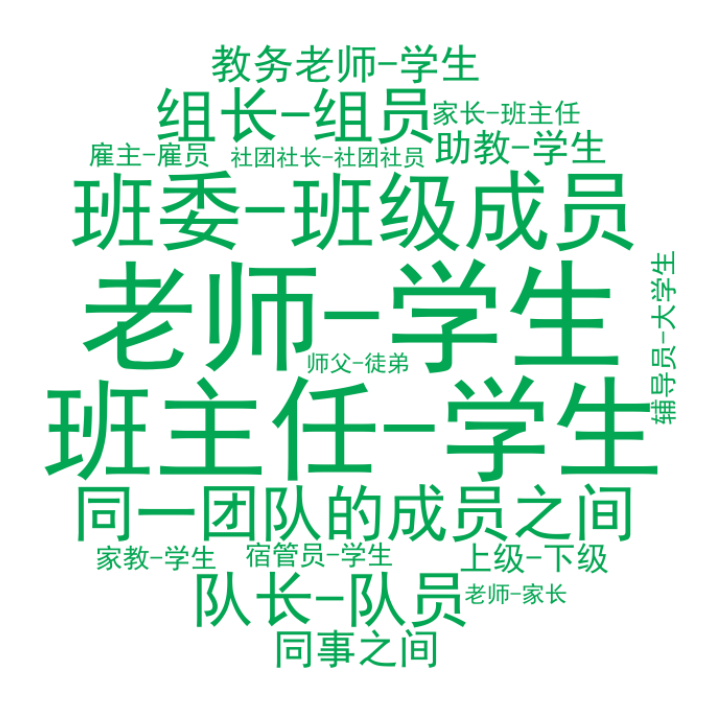

In [56]:
public_dict = {public_df.iloc[i,-1]:\
                public_df.iloc[i,-2] for i in range(len(public_df))}

wc = WordCloud(background_color='white',width=600,height=600,mask=mask,
               mode='RGBA',color_func=lambda *args, **kwargs: "#03A652",
               font_path='font/simhei.ttf',
               min_font_size=20
               )
wc.generate_from_frequencies(public_dict)

plt.figure(figsize=(6,6),dpi=150)
plt.imshow(wc,interpolation="bilinear")  
plt.axis("off")  
plt.show()